In [1]:
import os

filepath = os.path.join(os.getcwd(), "datasets_for_pandas", "titanic.csv")
filepath

'C:\\Users\\Bhavya\\LearnBay\\datasets_for_pandas\\titanic.csv'

https://www.kaggle.com/competitions/titanic/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(filepath)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,Ticket
0,0,3,male,22.0,1,0,7.2500,Southampton,NaN,"Braund, Mr. Owen Harris",A/5 21171
1,1,1,female,38.0,1,0,71.2833,Cherbourg,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,1,3,female,26.0,0,0,7.9250,Southampton,NaN,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,1,1,female,35.0,1,0,53.1000,Southampton,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,0,3,male,35.0,0,0,8.0500,Southampton,NaN,"Allen, Mr. William Henry",373450


# Analytics : 
- Domain dataset ???


- column datatype and then create a Chart
- df.info()


- Can be Univariate, Bivariate and Multi variate




# Univariate Analysis : 
- Analysing single column at a time. Studing the distribution / count / frequency
- Numerical col : hist, area, density
- Categorical col ( vs its Count) : bar, pie


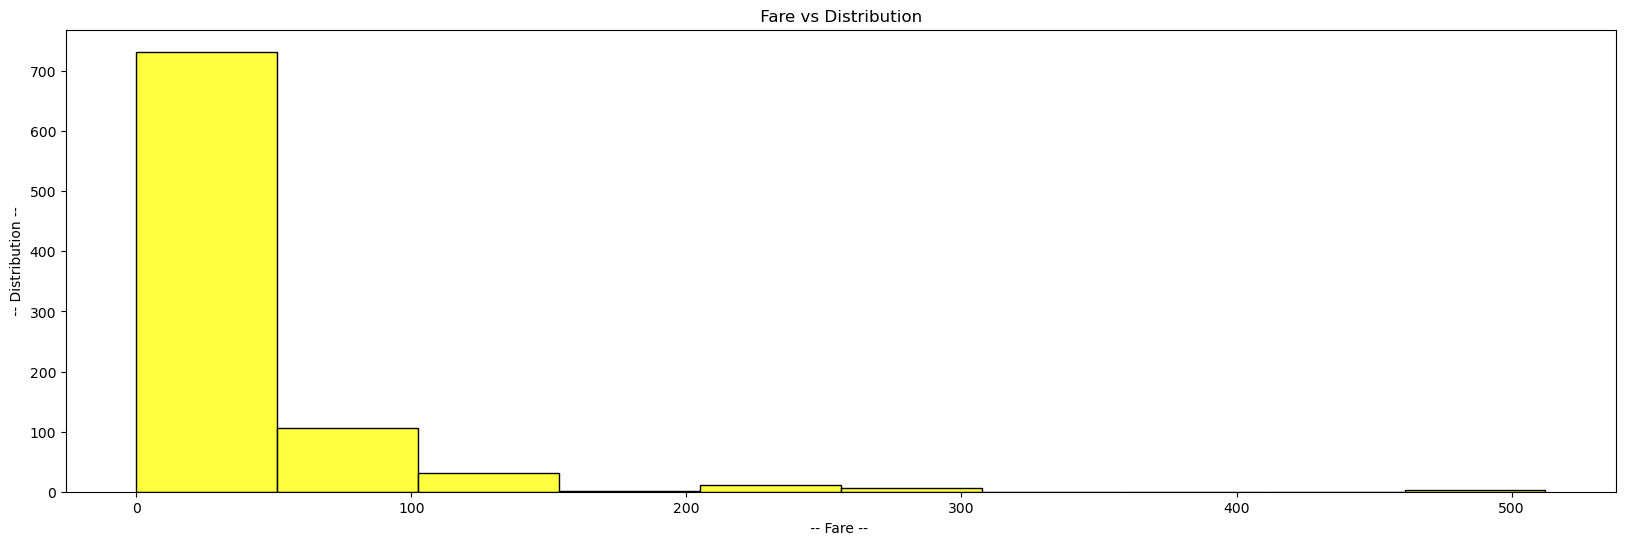

In [5]:
plt.figure( figsize = (20, 6) )
sns.histplot( df['Fare'], bins=10, color = 'yellow' ) # Bins refer to the number of bars

plt.xlabel(" -- Fare --  ")
plt.ylabel(" -- Distribution -- ")
plt.title( " Fare vs Distribution ")
plt.show()


In [7]:
df.shape

(891, 11)

In [8]:
df [ df[ "Fare" ] < 100 ].shape

(838, 11)

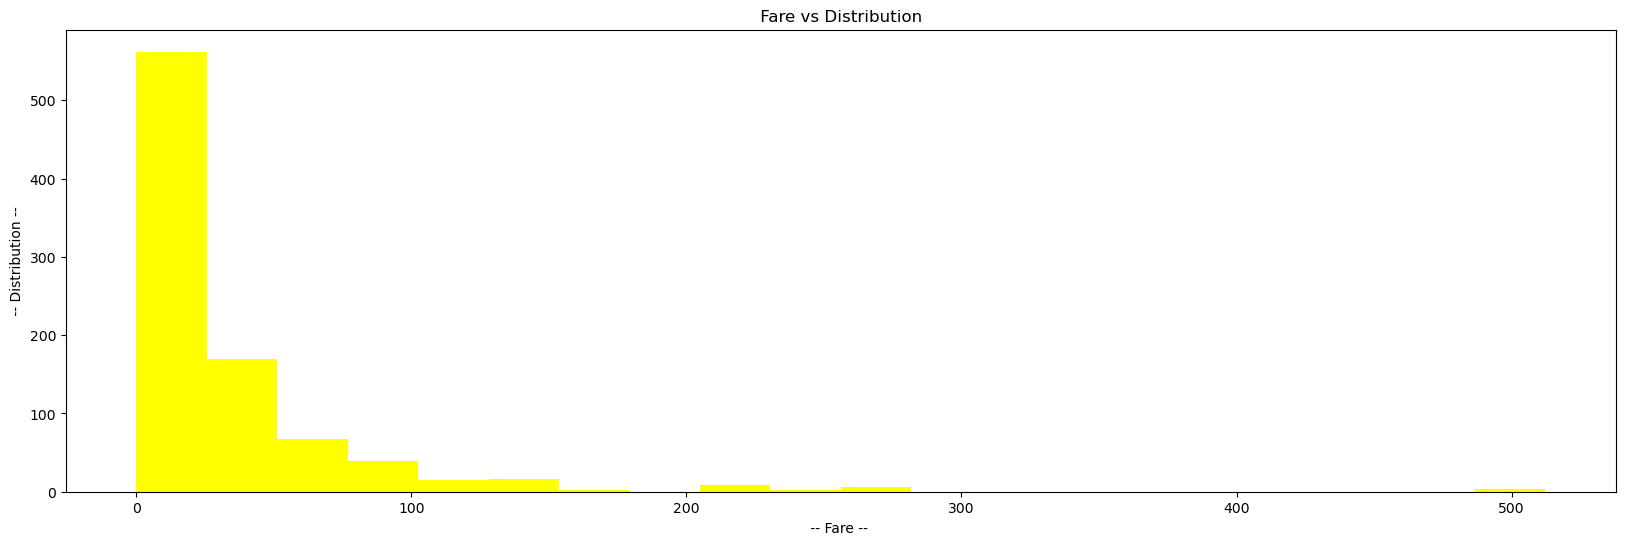

In [9]:
plt.figure( figsize = (20, 6) )
plt.hist( df['Fare'], color = 'yellow', bins = 20 )

plt.xlabel(" -- Fare --  ")
plt.ylabel(" -- Distribution -- ")
plt.title( " Fare vs Distribution ")
plt.show()


C:\Users\Bhavya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


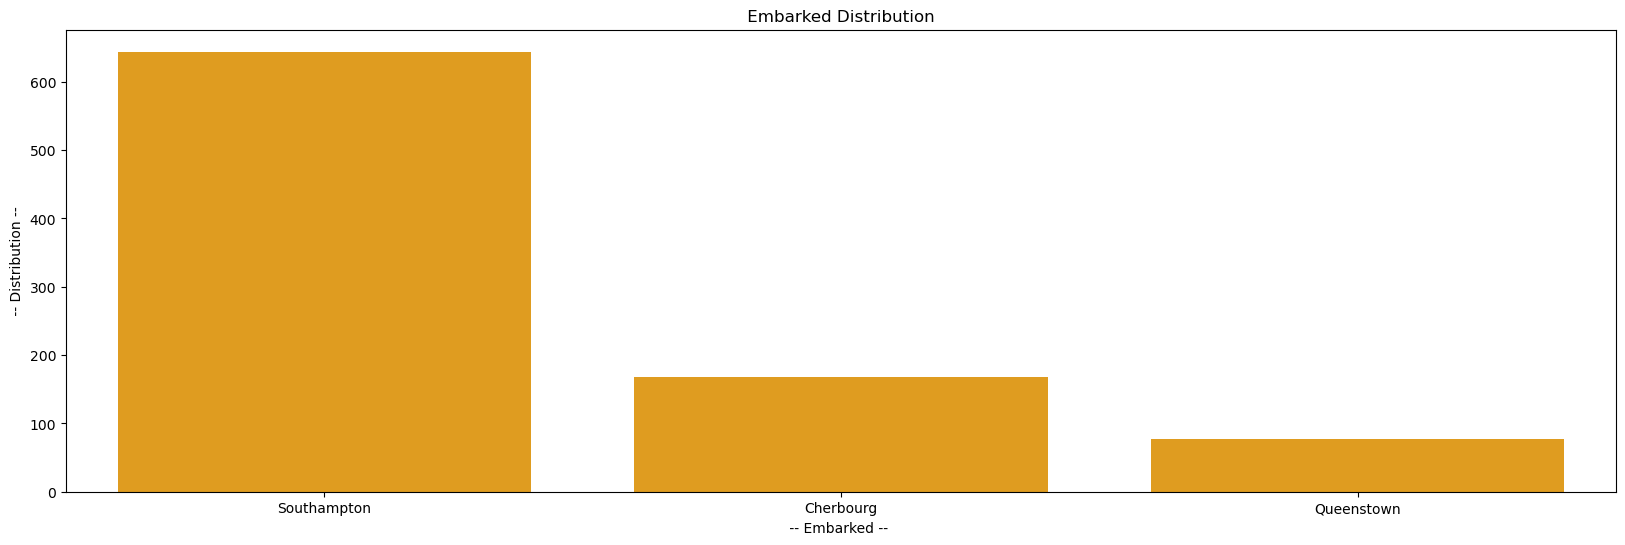

In [10]:
plt.figure( figsize = (20, 6) )

sns.countplot(df['Embarked'], color="orange")

plt.xlabel(" -- Embarked --  ")
plt.ylabel(" -- Distribution -- ")
plt.title( " Embarked Distribution ")
plt.show()



In [11]:
df['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

In [12]:
grp = df.groupby("Embarked").agg(Totalrecords = ("Embarked", np.size))
grp

lab = grp.index.values
x_ = grp.Totalrecords.values

print(lab)
print(x_)

['Cherbourg' 'Queenstown' 'Southampton']
[168  77 644]


In [13]:
lab = df['Embarked'].value_counts().index.values
x_ = df['Embarked'].value_counts().values

print(lab)
print(x_)

['Southampton' 'Cherbourg' 'Queenstown']
[644 168  77]


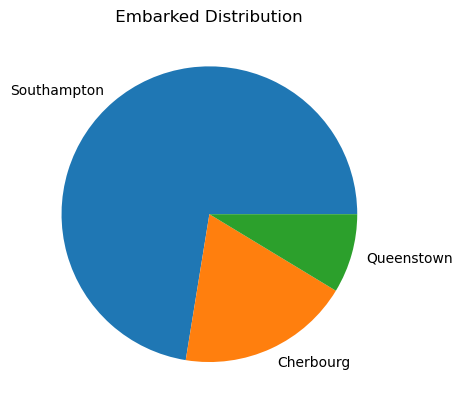

In [14]:
plt.pie( x = x_, labels = lab  )
plt.title( " Embarked Distribution ")
plt.show()

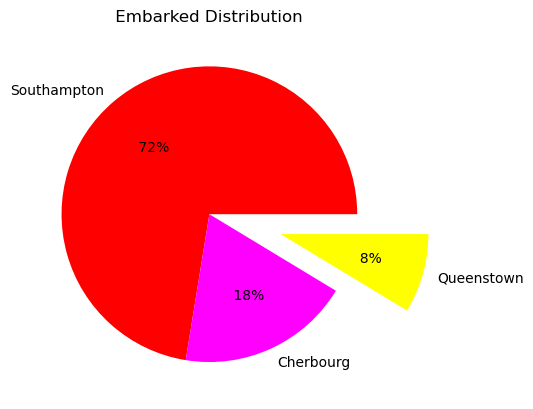

In [15]:
plt.pie( x = x_, labels = lab  , colors=['red', 'magenta', "yellow"], autopct = "%3d%%", 
        explode = [0, 0, 0.5]) # explode = radius * n
plt.title( " Embarked Distribution ")
plt.show()

# Bivariate Analysis : 
- Analysing two column at a time. 
- Numerical vs Numerical  : scatter
- Numerical vs Categorical  : bar, pie, box, strip, ... 


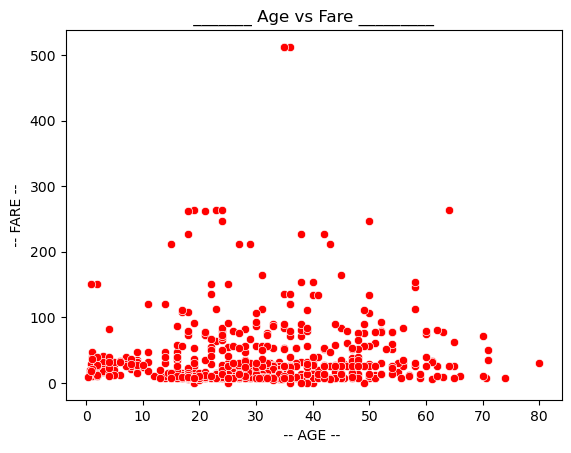

In [16]:
sns.scatterplot( x = df['Age'], y = df['Fare'], color = 'red' )

plt.xlabel(" -- AGE --  ")
plt.ylabel(" -- FARE -- ")
plt.title( " _______ Age vs Fare _________ ")
plt.show()


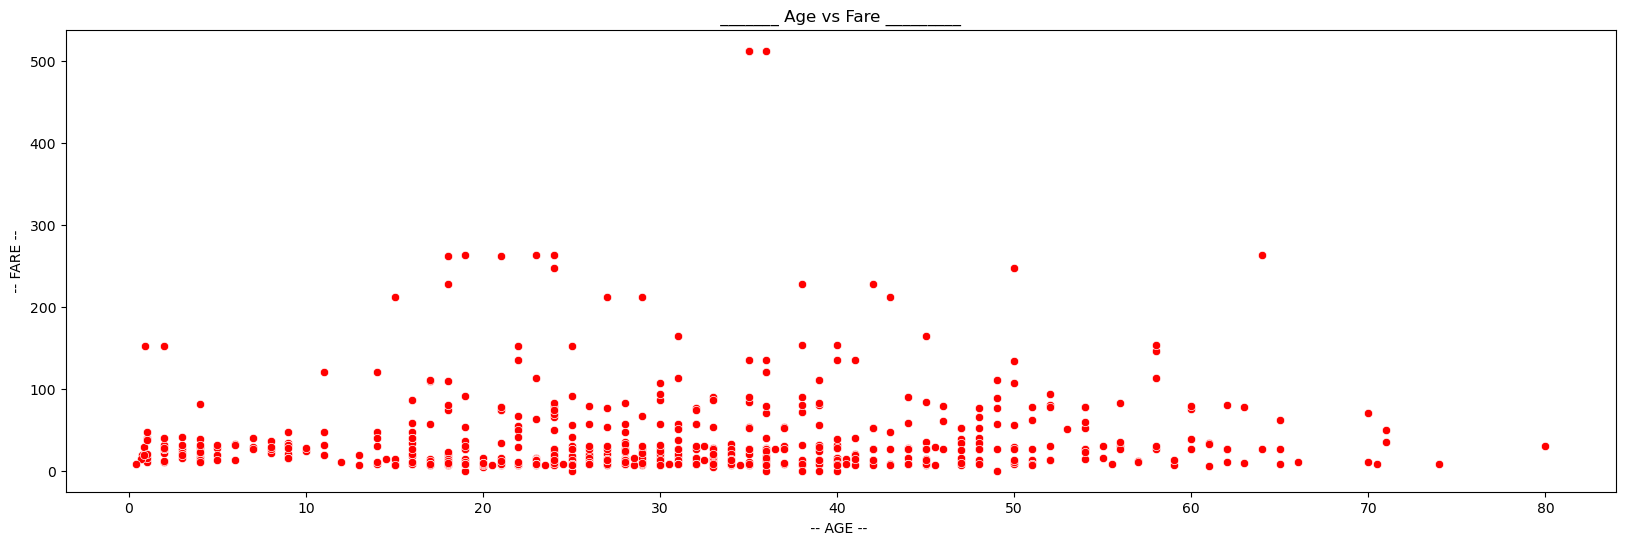

In [17]:

plt.figure( figsize = (20, 6) )

sns.scatterplot( x = df['Age'], y = df['Fare'], color = 'red' )

plt.xlabel(" -- AGE --  ")
plt.ylabel(" -- FARE -- ")
plt.title( " _______ Age vs Fare _________ ")
plt.show()


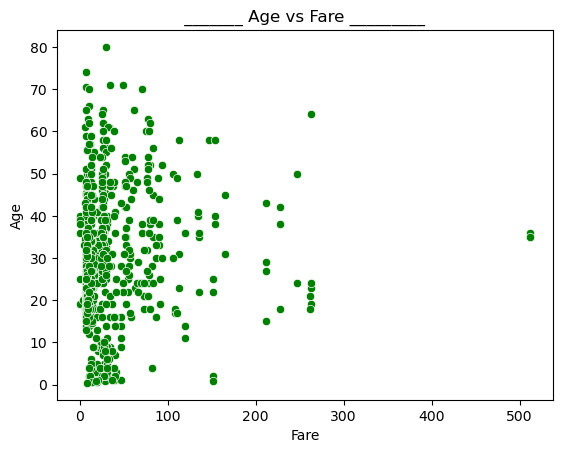

In [19]:
sns.scatterplot( y = df['Age'], x = df['Fare'], color = 'green' )

plt.title( " _______ Age vs Fare _________ ")
plt.show()


In [20]:
df[df["Fare"]>=500]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,Ticket
258,1,1,female,35.0,0,0,512.3292,Cherbourg,NaN,"Ward, Miss. Anna",PC 17755
679,1,1,male,36.0,0,1,512.3292,Cherbourg,B51 B53 B55,"Cardeza, Mr. Thomas Drake Martinez",PC 17755
737,1,1,male,35.0,0,0,512.3292,Cherbourg,B101,"Lesurer, Mr. Gustave J",PC 17755


In [21]:
Survived = df.groupby("Survived").agg(Totalrecords = ("Survived", np.size), 
                                     MeanAge = ("Age", np.mean), 
                                     Fare = ('Fare', np.sum))

print(Survived)

lab = Survived.index.astype(str).values
x_ = Survived.MeanAge.values

print(lab)
print(x_)

          Totalrecords    MeanAge        Fare
Survived                                     
0                  549  30.626179  12142.7199
1                  342  28.343690  16551.2294
['0' '1']
[30.62617925 28.34368966]


In [22]:
gender = df.groupby("Sex").agg(Totalrecords = ("Survived", np.size), 
                                     MeanAge = ("Age", np.mean), 
                                     Fare = ('Fare', np.sum))

print(gender)

lab = gender.index.values
x_ = gender.MeanAge.values

print(lab)
print(x_)

        Totalrecords    MeanAge        Fare
Sex                                        
female           314  27.915709  13966.6628
male             577  30.726645  14727.2865
['female' 'male']
[27.91570881 30.72664459]


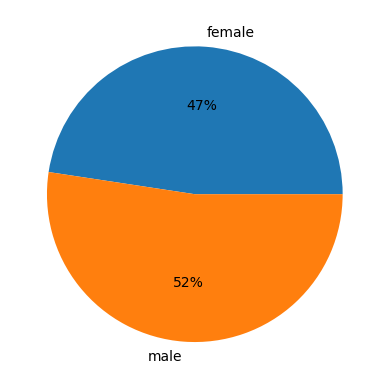

In [23]:
plt.pie( x = x_, labels = lab , autopct = "%2d%%" )

plt.show()


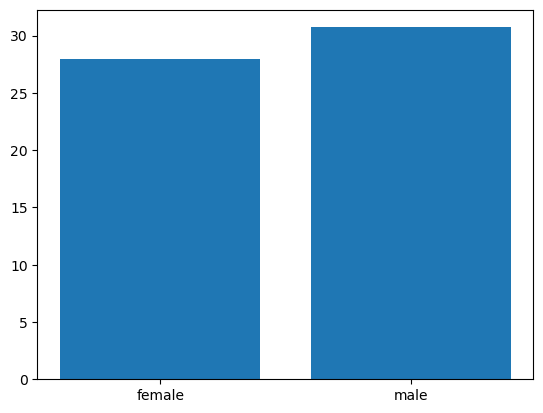

In [24]:
plt.bar( height = x_, x = lab )

plt.show()


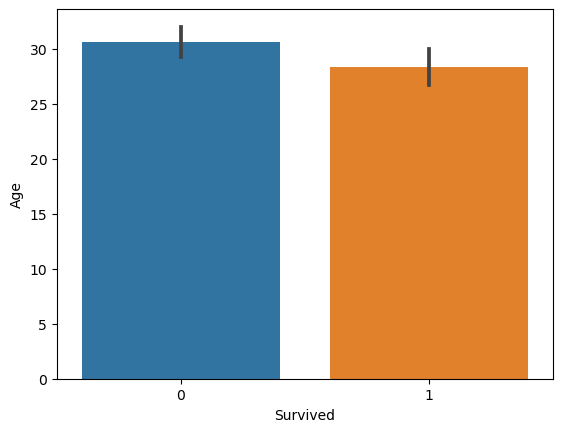

In [25]:
# seaborn bar chart provides MEAN value. vertical black line is the Std Dev


sns.barplot( x = df['Survived'], y = df['Age'] )
plt.show()

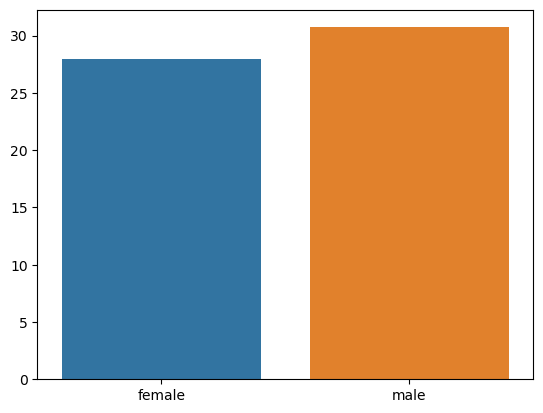

In [28]:
sns.barplot( x = lab, y = x_ )
plt.show()

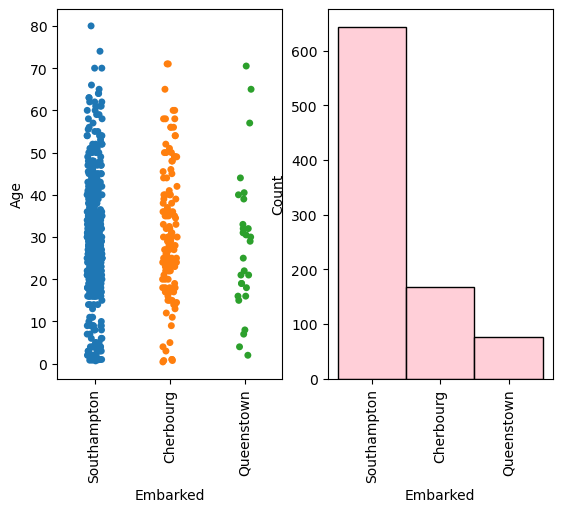

In [38]:
plt.subplot(1,2,1)
sns.stripplot( x = df['Embarked'], y = df['Age'] )

plt.xticks( rotation = 90)

plt.subplot(1,2,2)
sns.histplot( x = df['Embarked'], bins = 10, color = "pink" )

plt.xticks( rotation = 90)
plt.show()

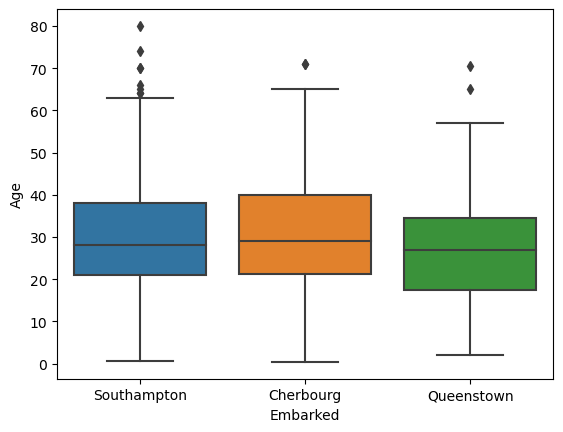

In [39]:
sns.boxplot( x = df['Embarked'], y = df['Age'] )


plt.show()

In [52]:
query = df[ df['Embarked'] == "Cherbourg" ]["Age"].describe()
print(query)

q3 = 40
q2 = 29
q1 = 21.25
iqr = 40 - 21.25
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("upper = ",upper)
print("lower = ",lower)



count    130.000000
mean      30.814769
std       15.434860
min        0.420000
25%       21.250000
50%       29.000000
75%       40.000000
max       71.000000
Name: Age, dtype: float64
upper =  68.125
lower =  -6.875


In [44]:
df [ df["Embarked"] == "Cherbourg"]["Age"].describe()

count    130.000000
mean      30.814769
std       15.434860
min        0.420000
25%       21.250000
50%       29.000000
75%       40.000000
max       71.000000
Name: Age, dtype: float64

In [45]:
df [ df["Embarked"] == "Queenstown"]["Age"].describe()

count    28.000000
mean     28.089286
std      16.915396
min       2.000000
25%      17.500000
50%      27.000000
75%      34.500000
max      70.500000
Name: Age, dtype: float64

#### Seabron colors : 

**color --> single solid color**

**palette --> combination of colors**

https://seaborn.pydata.org/tutorial/color_palettes.html


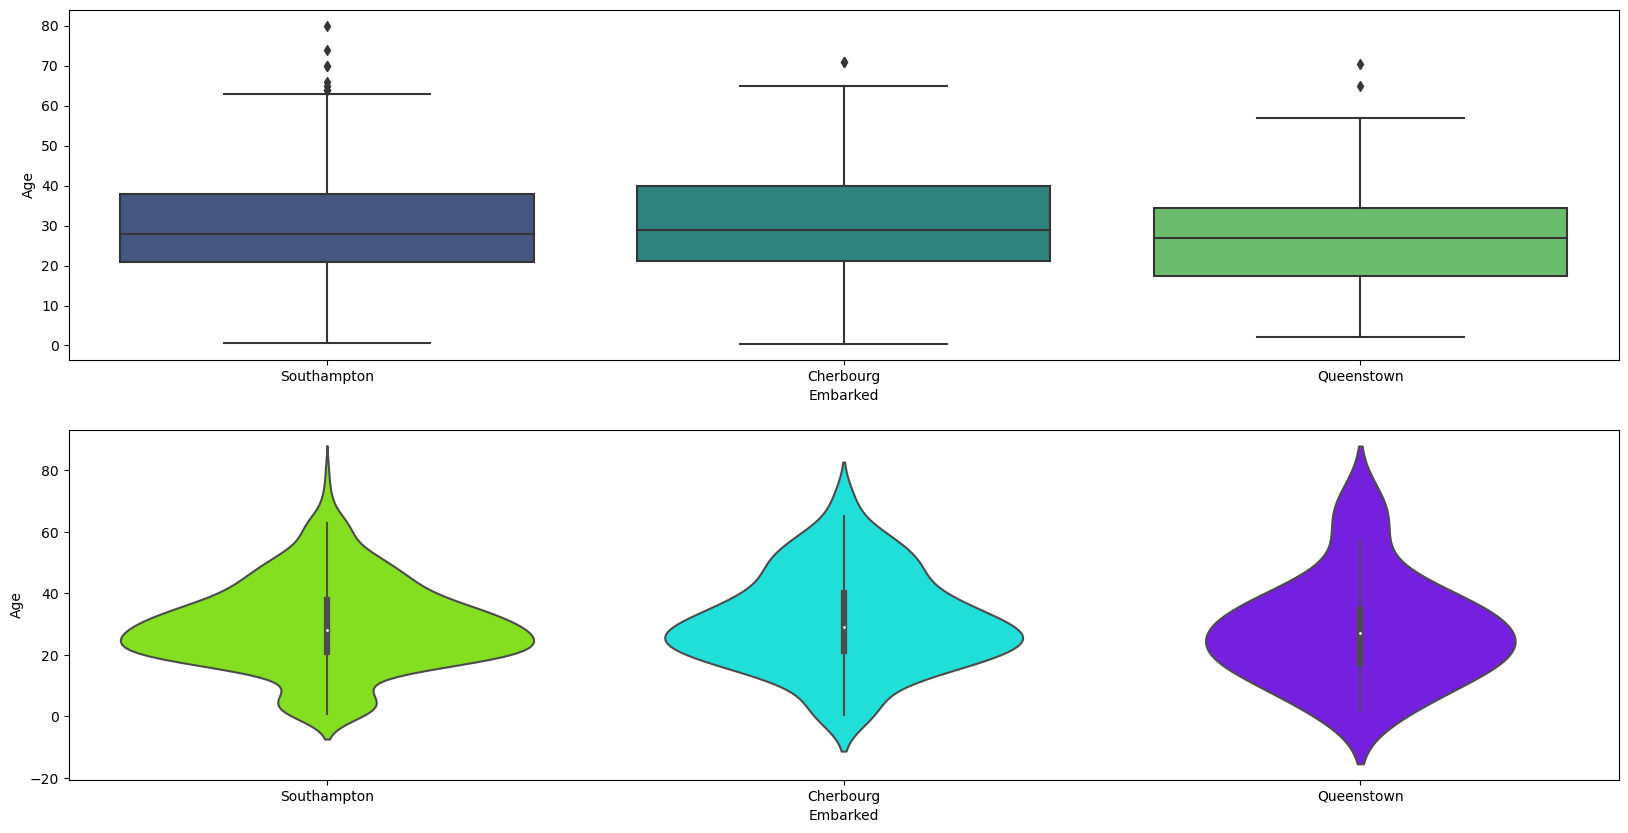

In [53]:
plt.figure( figsize = (20, 10) )

plt.subplot( 2, 1, 1 )
sns.boxplot( x = df['Embarked'], y = df['Age'] , palette="viridis")

plt.subplot( 2, 1, 2 )
sns.violinplot( x = df['Embarked'], y = df['Age'] , palette="hsv")


plt.show()


# Multi-variate Analysis : 
- Analysing more than two column at a time.
- Numerical vs Numerical vs (Categorical - COLORS) : scatter
- Numerical vs Categorical vs (Categorical- COLORS) : bar, pie, box, strip, ... 


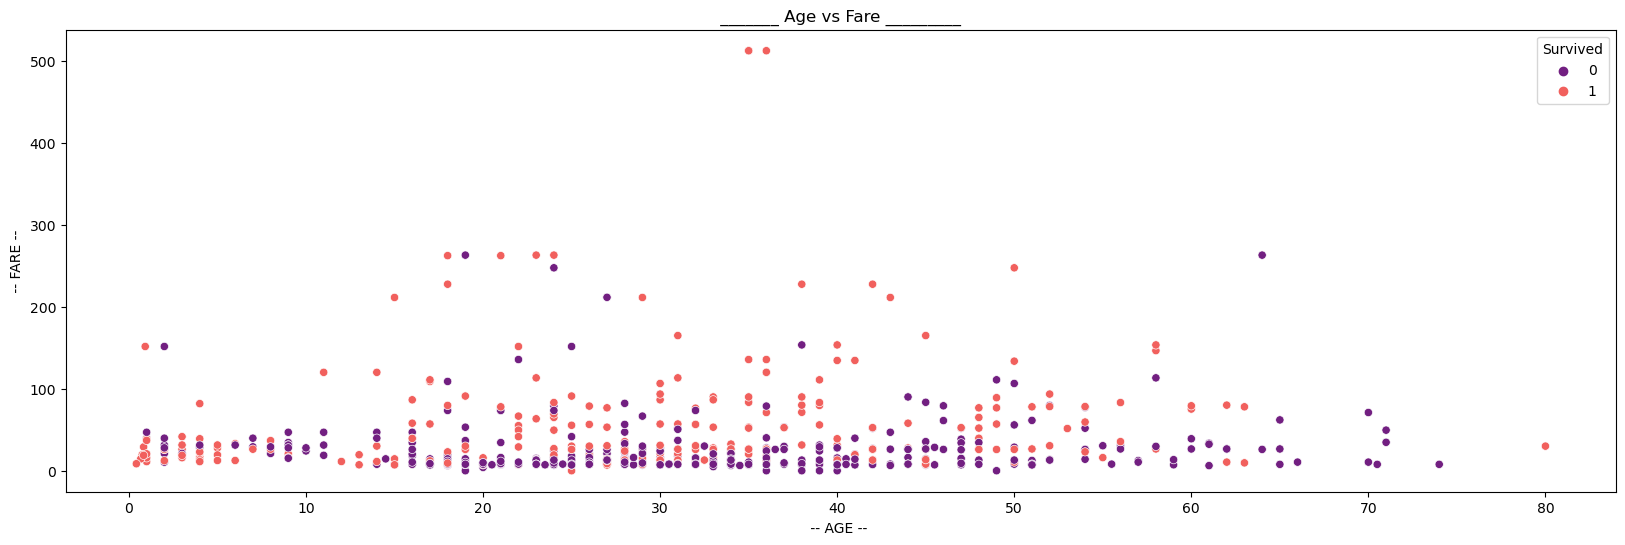

In [54]:
plt.figure( figsize = (20, 6) )

sns.scatterplot( x = df['Age'], y = df['Fare'], hue = df['Survived'], palette='magma' )

plt.xlabel(" -- AGE --  ")
plt.ylabel(" -- FARE -- ")
plt.title( " _______ Age vs Fare _________ ")
plt.show()

In [55]:
df[ df['Fare'] > 500 ]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,Ticket
258,1,1,female,35.0,0,0,512.3292,Cherbourg,NaN,"Ward, Miss. Anna",PC 17755
679,1,1,male,36.0,0,1,512.3292,Cherbourg,B51 B53 B55,"Cardeza, Mr. Thomas Drake Martinez",PC 17755
737,1,1,male,35.0,0,0,512.3292,Cherbourg,B101,"Lesurer, Mr. Gustave J",PC 17755


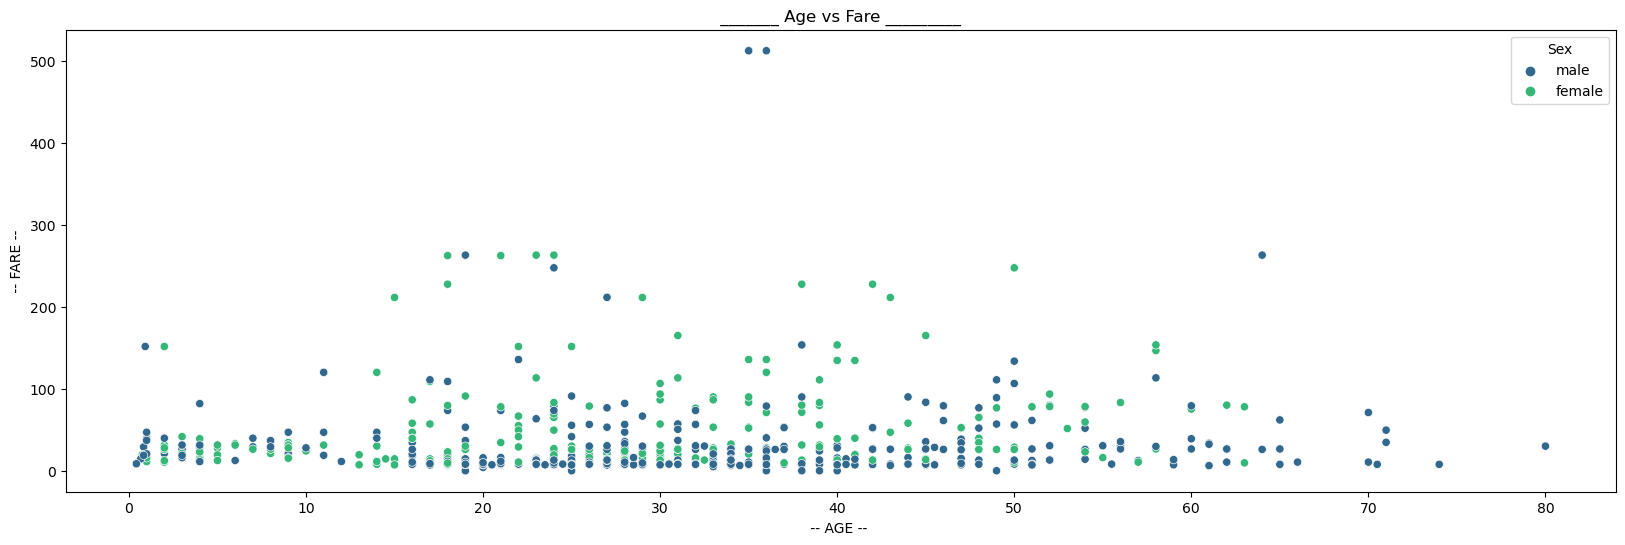

In [57]:
plt.figure( figsize = (20, 6) )

sns.scatterplot( x = df['Age'], y = df['Fare'], hue = df['Sex'], palette='viridis' )

plt.xlabel(" -- AGE --  ")
plt.ylabel(" -- FARE -- ")
plt.title( " _______ Age vs Fare _________ ")
plt.show()

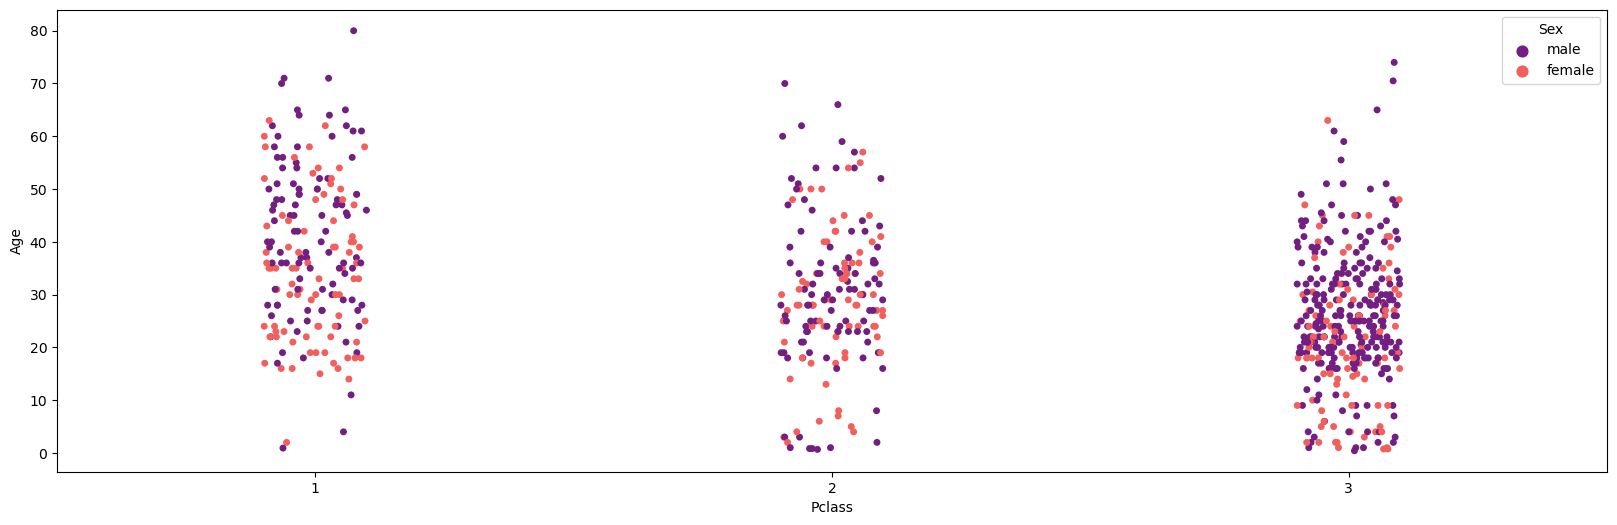

In [58]:
plt.figure( figsize = (20, 6) )

sns.stripplot( x = df['Pclass'], y = df['Age'], palette = "magma" , hue = df['Sex'] )


plt.show()
